In [1]:
# make the current working directory the project root directory
import os
PROJECT_ROOT_DIRECTORY = 'senior_project'
while os.path.basename(os.getcwd()) != PROJECT_ROOT_DIRECTORY:
    os.chdir(os.pardir)
print('Current working directory:', os.getcwd())

Current working directory: c:\Users\pavan\Desktop\senior_project


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import yfinance as yf

In [3]:
TICKERS = ['AAPL', 'GOOGL', 'MSFT']

In [4]:
stock_df = yf.download(
    TICKERS, 
    start='2022-01-01', 
    end='2022-12-31'
)['Adj Close']

[*********************100%***********************]  3 of 3 completed


In [5]:
stock_df.head()

,AAPL,GOOGL,MSFT
Date,,,
2022-01-03,180.683868,144.991501,330.813843
2022-01-04,178.390717,144.399506,325.141357
2022-01-05,173.645523,137.774994,312.659882
2022-01-06,170.746826,137.747498,310.189270
2022-01-07,170.915558,137.016998,310.347382


In [6]:
stock_df.isna().sum()

AAPL     0
GOOGL    0
MSFT     0
dtype: int64

In [7]:
returns_df = stock_df.pct_change(1).dropna()
returns_df.head()

,AAPL,GOOGL,MSFT
Date,,,
2022-01-04,-0.012692,-0.004083,-0.017147
2022-01-05,-0.026600,-0.045876,-0.038388
2022-01-06,-0.016693,-0.000200,-0.007902
2022-01-07,0.000988,-0.005303,0.000510
2022-01-10,0.000116,0.012061,0.000732


If I had `$1` of AAPL stocks on `2022-01-03`, I would lose `-$0.012692` on `2022-01-04`.

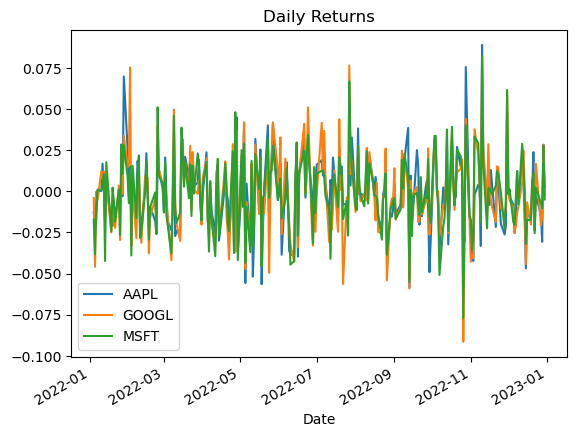

In [8]:
returns_df.plot(title='Daily Returns');

A **stationary time-series** is one whose properties do not depend on the time at which the series is observed. A **normalised dataset** is one with a mean of zero and a standard deviation of 1.

While **prices are typically not stationary or normalized**, the **returns are more likely to be stationary** and have a mean of zero. This makes them much easier to work with. See [here](https://stats.stackexchange.com/questions/465514/why-prices-are-usually-not-stationary-but-returns-are-more-likely-to-be-station) for more details.

In [9]:
returns_df.to_csv('data/returns_toy_dataset.csv') # save to csv